<a href="https://colab.research.google.com/github/Shana54321/DS4A_Team145/blob/main/Team_145_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np





In [ ]:
yfd = pd.read_csv('/content/drive/MyDrive/Team 145/cleaned_Yahoo_Finance_Detail.csv')
yfd['id'] = yfd['id'].fillna (11)
yfd =yfd.astype({'quotesymbol': str,'company_name': str,'date': str,'open': float,'high': float,'low': float,'close': float,'adj _close': float,'volume': int,'id': int})
yfd['date']=pd.to_datetime(yfd['date'])


In [69]:
"""Twitter_data"""
#comcast data with label for sentiment 0,1,2
comcast_twitter=pd.read_csv('/content/drive/MyDrive/Team 145/comcast/tw_merged_df_labels.csv')
#dataframe without label-Tolu will append sentiment 0,1,2
wendys_twitter=pd.read_csv('/content/drive/MyDrive/Team 145/wendys/tw_merged_df.csv')
walmart_twitter=pd.read_csv('/content/drive/MyDrive/Team 145/walmart/tw_merged_df.csv')
uber_twitter=pd.read_csv('/content/drive/MyDrive/Team 145/uber/tw_merged_df.csv')
starbucks_twitter=pd.read_csv('/content/drive/MyDrive/Team 145/starbuck/tw_merged_df.csv')
Pepsi_twitter=pd.read_csv('/content/drive/MyDrive/Team 145/pepsi/tw_merged_df.csv')
PapaJohns_twitter=pd.read_csv('/content/drive/MyDrive/Team 145/papajohns/tw_merged_df.csv')
GM_twitter=pd.read_csv('/content/drive/MyDrive/Team 145/GM/tw_merged_df.csv')
Kellogs_twitter=pd.read_csv('/content/drive/MyDrive/Team 145/kellogs/tw_merged_df.csv')
Netflix_twitter=pd.read_csv('/content/drive/MyDrive/Team 145/Netflix/tw_merged_df.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
##yfd = pd.read_csv('/content/drive/MyDrive/Team 145/cleaned_Yahoo_Finance_Detail.csv', index_col=(), dtype={'quotesymbol': str, 'company_name': str,'date': str,'open': float,'high': float,'low': float,'close': float,'adj_close': float,'volume': int,'id': int})
#yfd['date']=pd.to_datetime(yfd['date'])



AttributeError: ignored

In [ ]:
df=yfd.copy()
df
df.set_index('date',drop = True, append = False).resample('D') 
df["VolStat"] = (df["high"] - df["low"]) / df["open"] #A measure of volatility
df['quotesymbol'].unique()

array(['^VIX', 'RMS.PA', 'GOOS', 'W', 'FB', 'TGT', 'TM', 'BCS', 'K',
       'AMZN', 'HD', 'WEN', 'PEP', 'SBUX', 'PZZA', 'CMCSA', 'NFLX', 'WMT',
       'GM', 'UBER'], dtype=object)

In [86]:
df2 = comcast_twitter.copy()
df2.head()

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet,quotesymbol,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,sentiment_label
0,1.502146e+09,2016-01-30 23:58:36+00:00,NaN,6.940000e+17,en,1,0,0,0,Twitter for iPhone,Thank you Comcast for Oxygen channel!!!!!,CMCSA,Thank you Comcast for Oxygen channel!!!!!,thank you comcast for oxygen channel,0.000000,0.000000,positive,0.000,0.667,0.333,0.3612,2
1,3.232153e+09,2016-01-30 23:58:16+00:00,NaN,6.940000e+17,en,1,0,1,0,Twitter Web App,@comcastcares @comcast @XFINITY I hate xfinity...,CMCSA,@comcastcares @comcast @XFINITY I hate xfinity...,i hate xfinity always issues another s...,-0.800000,0.900000,negative,0.371,0.629,0.000,-0.7096,0
2,1.382550e+09,2016-01-30 23:57:26+00:00,NaN,6.940000e+17,en,0,0,2,0,Twitter for iPhone,Comcast modems are top-notch. Every time we ge...,CMCSA,Comcast modems are top-notch. Every time we ge...,comcast modems are top notch every time we ge...,0.212121,0.651515,positive,0.000,0.927,0.073,0.2023,2
3,2.086465e+08,2016-01-30 23:56:28+00:00,NaN,6.940000e+17,en,0,0,0,6,Twitter for Android,RT @comcast: We’re excited for the possibiliti...,CMCSA,RT @comcast: We’re excited for the possibiliti...,we re excited for the possibilities that awai...,0.337121,0.568182,positive,0.000,0.759,0.241,0.4215,2
4,1.155615e+09,2016-01-30 23:54:46+00:00,NaN,6.940000e+17,en,1,0,0,0,Twitter Web Client,@comcast can my internet not spike every time ...,CMCSA,@comcast can my internet not spike every time ...,can my internet not spike every time i strea...,0.500000,0.500000,neutral,0.154,0.691,0.154,0.0000,1


In [124]:
import datetime as dt
df3=df2[['author id','created_at','sentiment']]
df3['created_at']=pd.to_datetime(df3['created_at']).dt.date
df3.head(100000)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,author id,created_at,sentiment
0,1.502146e+09,2016-01-30,positive
1,3.232153e+09,2016-01-30,negative
2,1.382550e+09,2016-01-30,positive
3,2.086465e+08,2016-01-30,positive
4,1.155615e+09,2016-01-30,neutral
...,...,...,...
30960,1.071978e+08,2021-05-30,negative
30961,2.738551e+07,2021-05-30,positive
30962,3.618262e+08,2021-05-30,positive
30963,4.603426e+07,2021-05-30,negative


In [125]:
df4= df3.groupby(['created_at','sentiment']).nunique()
df4.head(1000000)

author id
created_at sentiment           
2016-01-30 negative         170
           neutral          116
           positive         139
2016-02-27 negative         132
           neutral          149
...                         ...
2021-04-29 neutral          100
           positive         192
2021-05-30 negative          97
           neutral           96
           positive         210

[189 rows x 1 columns]

In [142]:
com_twt= df4.pivot_table(index=['created_at'],columns=['sentiment'],values='author id')
com_twt =com_twt.reset_index()
com_twt =com_twt.rename(columns ={'created_at':'date'})
com_twt["id"] =1
com_twt.head(10000)

sentiment,date,negative,neutral,positive,id
0,2016-01-30,170,116,139,1
1,2016-02-27,132,149,150,1
2,2016-03-30,124,112,182,1
3,2016-04-29,132,152,185,1
4,2016-05-30,154,148,144,1
...,...,...,...,...,...
58,2021-01-30,173,61,156,1
59,2021-02-27,114,83,171,1
60,2021-03-30,98,121,188,1
61,2021-04-29,98,100,192,1


In [ ]:
WEN =df[df['quotesymbol']=='WEN']
PEP=df[df['quotesymbol']=='PEP']
SBUX=df[df['quotesymbol']=='SBUX']
PZZA=df[df['quotesymbol']=='PZZA']
CMCSA=df[df['quotesymbol']=='CMCSA']
NFLX=df[df['quotesymbol']=='NFLX']
WMT=df[df['quotesymbol']=='WMT']
GM=df[df['quotesymbol']=='GM']
UBER=df[df['quotesymbol']=='UBER']

In [77]:
df1 =CMCSA.copy()

In [78]:
df1.head()

,quotesymbol,company_name,date,open,high,low,close,adj _close,volume,id,VolStat
62555,CMCSA,COMCAST CORP,2002-05-23,10.5000,10.6800,10.3900,10.6767,8.3515,926400,1,0.027619
62556,CMCSA,COMCAST CORP,2002-05-24,10.6633,10.6667,10.4533,10.5200,8.2289,417000,1,0.020013
62557,CMCSA,COMCAST CORP,2002-05-28,10.4633,10.4633,10.0833,10.2333,8.0047,597900,1,0.036317
62558,CMCSA,COMCAST CORP,2002-05-29,10.2033,10.2433,9.8700,9.9333,7.7700,543900,1,0.036586
62559,CMCSA,COMCAST CORP,2002-05-30,9.9000,10.1067,9.8767,9.9600,7.7909,660600,1,0.023232


In [147]:
com_stk = df1[['date','adj _close','volume', 'VolStat']]
com_stk["id"] = 1
com_stk['date']= pd.to_datetime(com_stk['date']).dt.date
com_stk.head(1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,adj _close,volume,VolStat,id
62555,2002-05-23,8.3515,926400,0.027619,1
62556,2002-05-24,8.2289,417000,0.020013,1
62557,2002-05-28,8.0047,597900,0.036317,1
62558,2002-05-29,7.7700,543900,0.036586,1
62559,2002-05-30,7.7909,660600,0.023232,1
...,...,...,...,...,...
63550,2006-05-05,8.0255,23810400,0.015358,1
63551,2006-05-08,8.0985,24978900,0.021533,1
63552,2006-05-09,8.2315,31998000,0.027045,1
63553,2006-05-10,8.4140,50904900,0.029791,1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,author id,created_at,sentiment
0,1.502146e+09,2016-01-30,positive
1,3.232153e+09,2016-01-30,negative
2,1.382550e+09,2016-01-30,positive
3,2.086465e+08,2016-01-30,positive
4,1.155615e+09,2016-01-30,neutral
...,...,...,...
30960,1.071978e+08,2021-05-30,negative
30961,2.738551e+07,2021-05-30,positive
30962,3.618262e+08,2021-05-30,positive
30963,4.603426e+07,2021-05-30,negative


In [148]:
pd.merge(com_stk, com_twt, how ='inner', on=['id','date'])

,date,adj _close,volume,VolStat,id,negative,neutral,positive
0,2016-03-30,27.4601,16006000,0.011983,1,124,112,182
1,2016-04-29,27.5646,29336600,0.017016,1,132,152,185
2,2016-06-29,29.0072,20626800,0.015394,1,132,136,133
3,2016-08-30,29.8636,12781200,0.008527,1,121,136,166
4,2016-09-29,30.1825,18664000,0.013497,1,122,96,189
5,2016-11-29,32.0878,30491200,0.028321,1,118,153,156
6,2016-12-30,31.7136,24376800,0.016011,1,135,141,142
7,2017-01-30,34.6024,26341800,0.018589,1,112,109,168
8,2017-02-27,34.4738,9563600,0.007945,1,86,137,207
9,2017-03-30,34.4555,10232300,0.011312,1,138,170,128


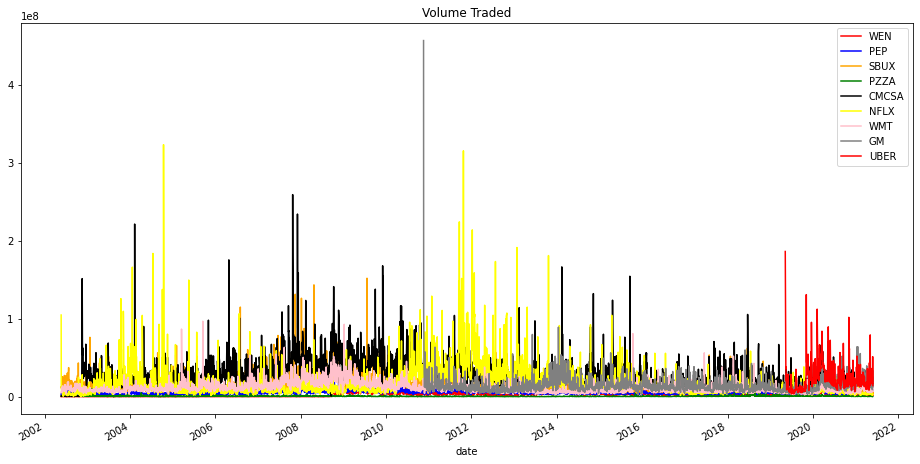

In [ ]:
"""Volume Traded on one Plot"""

ax = plt.gca()
WEN.plot(x='date', y='volume',label='WEN',figsize=(16,8),title='Volume Traded', color='red', ax=ax)
PEP.plot(x='date', y='volume',label='PEP',color='blue', ax=ax)
SBUX.plot(x='date', y='volume',label='SBUX',color='orange',ax=ax)
PZZA.plot(x='date', y='volume',label='PZZA',color='green', ax=ax)
CMCSA.plot(x='date', y='volume',label='CMCSA',color='black', ax=ax)
NFLX.plot(x='date', y='volume',label='NFLX', color='yellow', ax=ax)
WMT.plot(x='date', y='volume',label='WMT', color='pink', ax=ax)
GM.plot(x='date', y='volume',label='GM',color='gray', ax=ax)
UBER.plot(x='date', y='volume',label='UBER', color='red', ax=ax)
plt.legend();

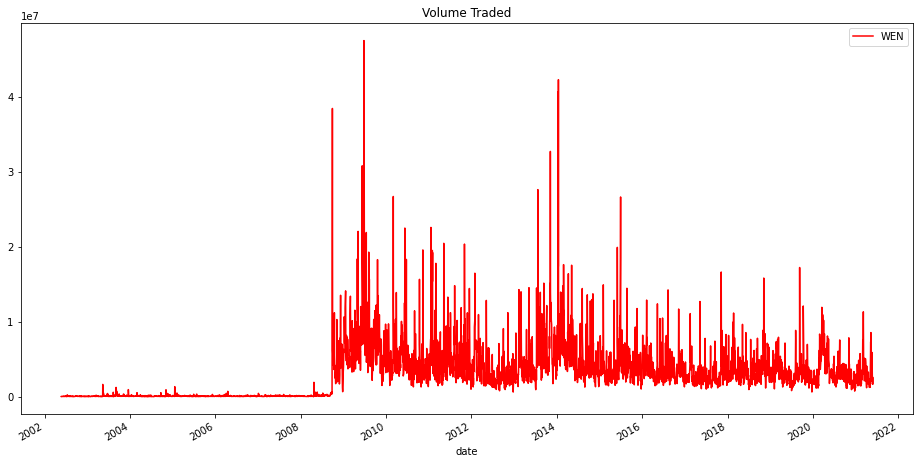

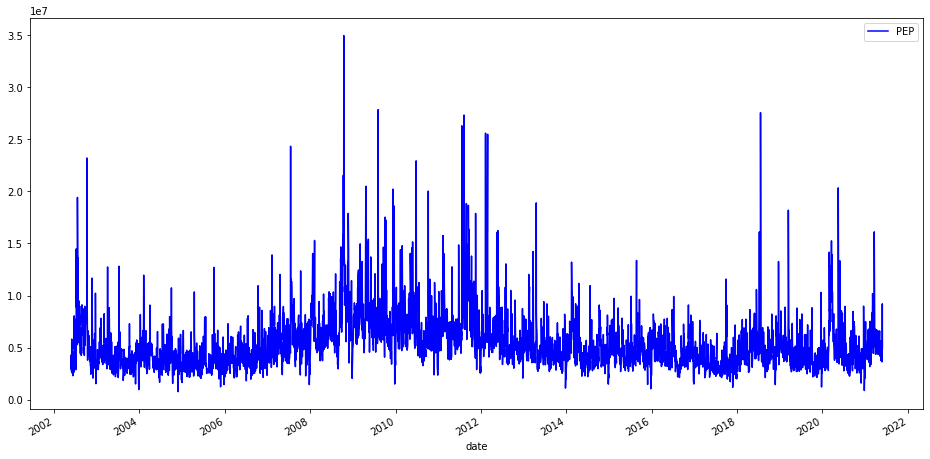

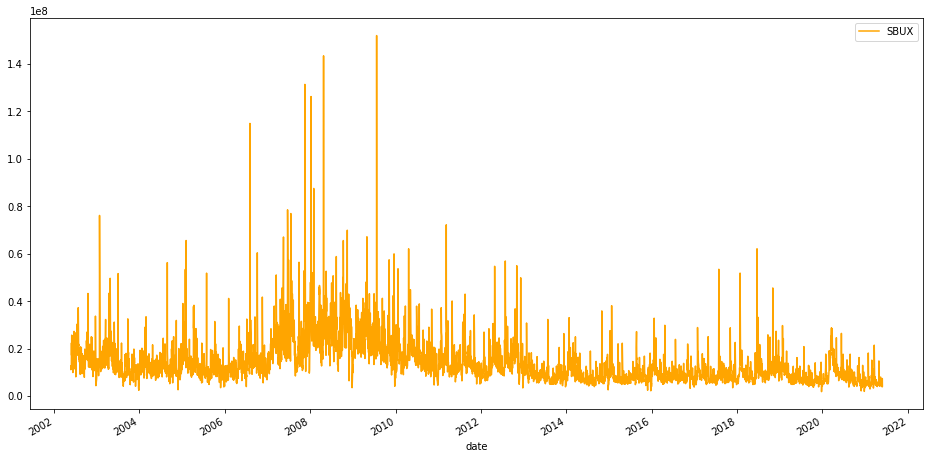

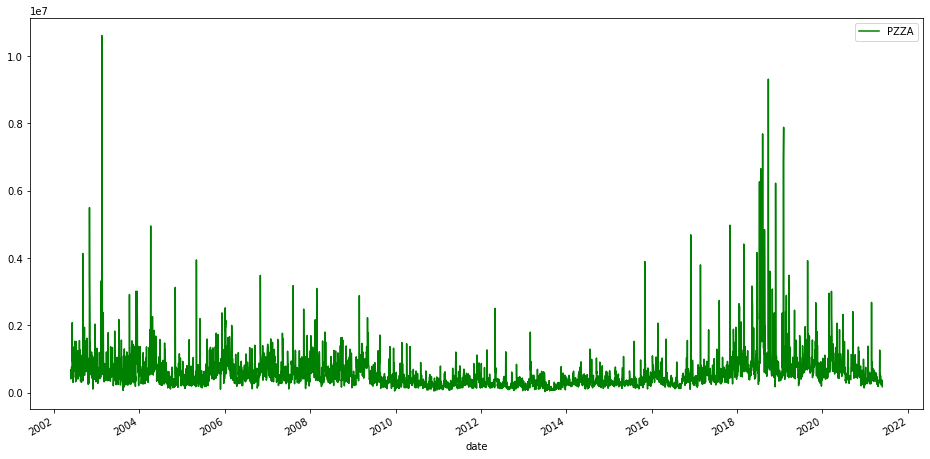

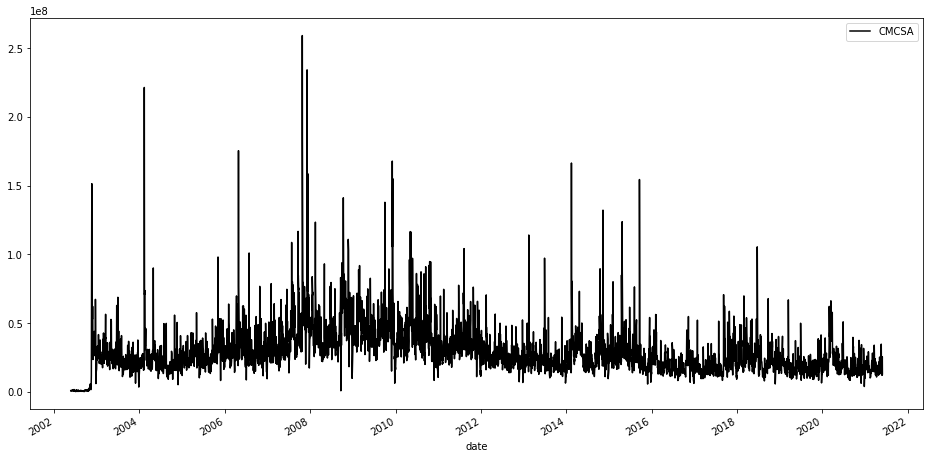

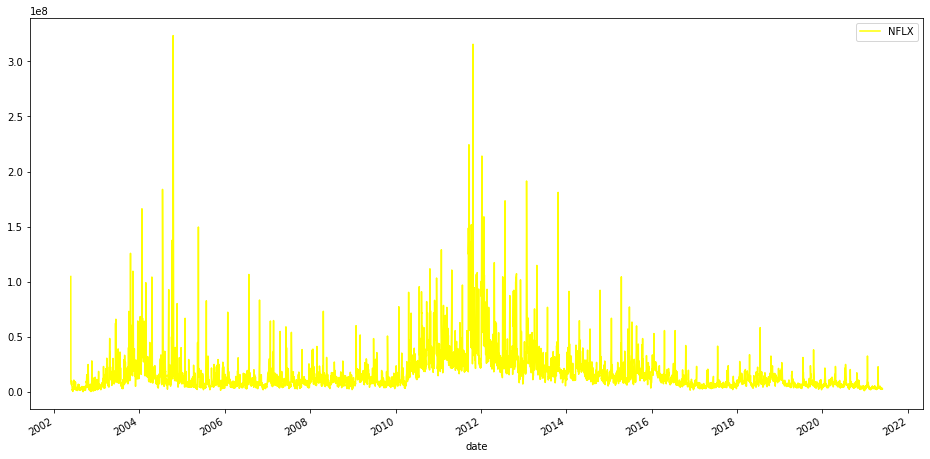

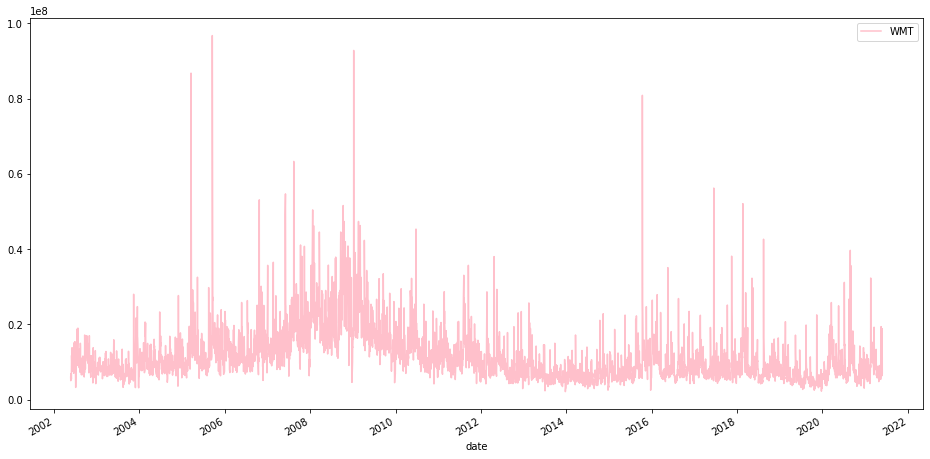

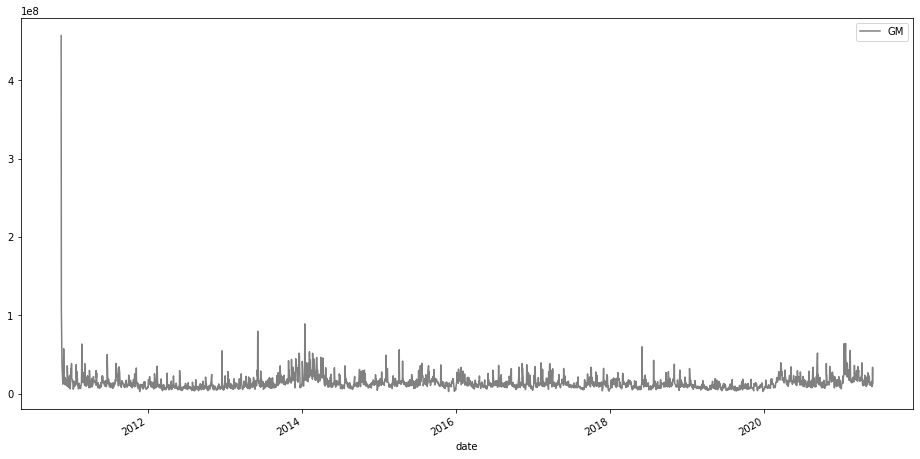

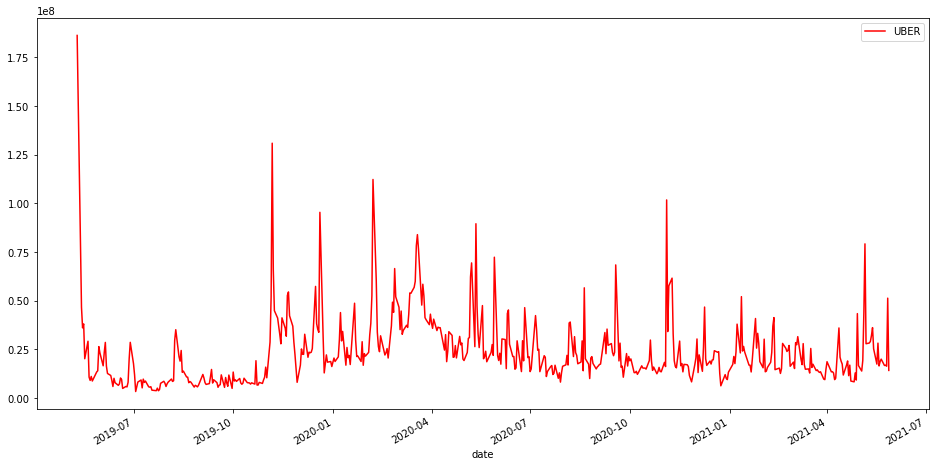

In [ ]:
"""Volume traded by company"""

WEN.plot(x='date', y='volume',label='WEN',figsize=(16,8),title='Volume Traded', color='red')
PEP.plot(x='date', y='volume',label='PEP', figsize=(16,8),color='blue')
SBUX.plot(x='date', y='volume',label='SBUX',figsize=(16,8),color='orange')
PZZA.plot(x='date', y='volume',label='PZZA',figsize=(16,8),color='green', )
CMCSA.plot(x='date', y='volume',label='CMCSA',figsize=(16,8),color='black')
NFLX.plot(x='date', y='volume',label='NFLX',figsize=(16,8), color='yellow')
WMT.plot(x='date', y='volume',label='WMT',figsize=(16,8), color='pink')
GM.plot(x='date', y='volume',label='GM',figsize=(16,8),color='gray')
UBER.plot(x='date', y='volume',label='UBER',figsize=(16,8), color='red')
plt.legend();

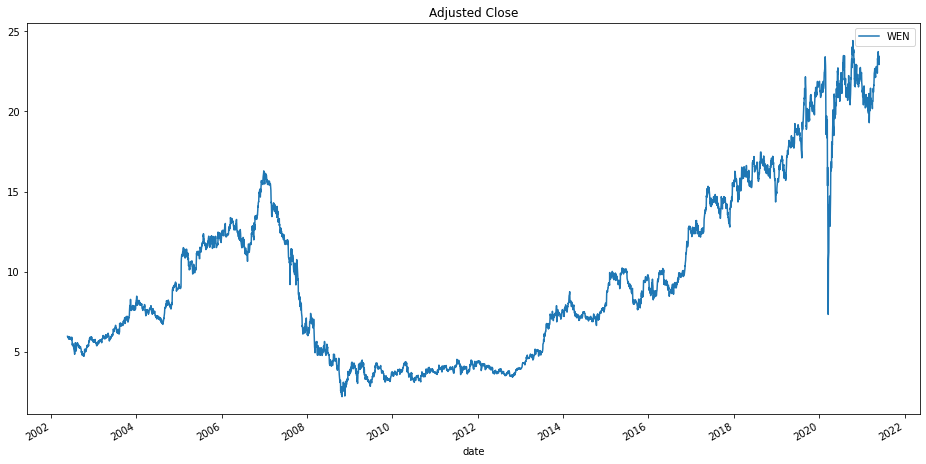

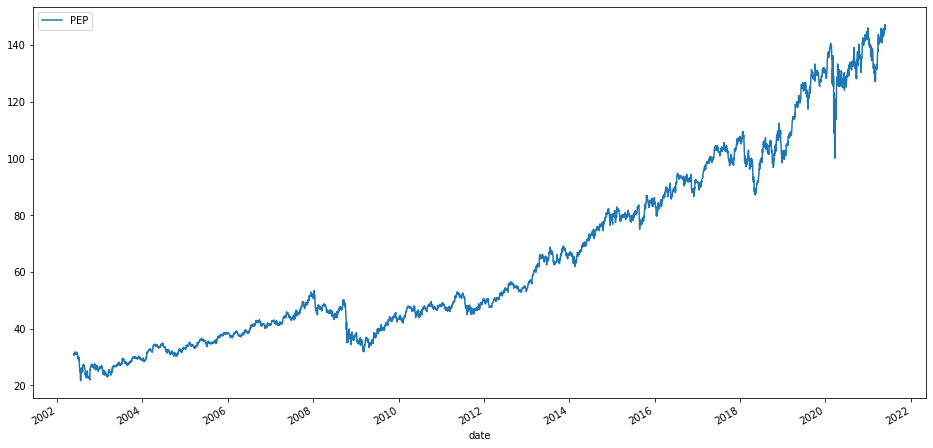

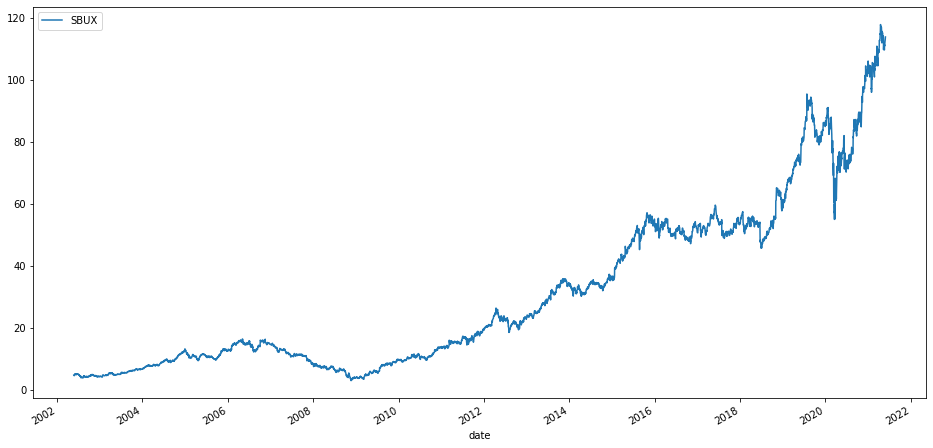

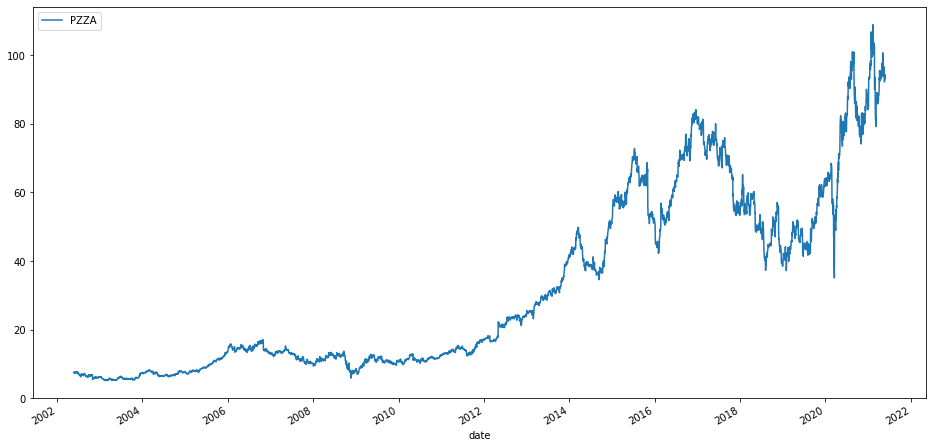

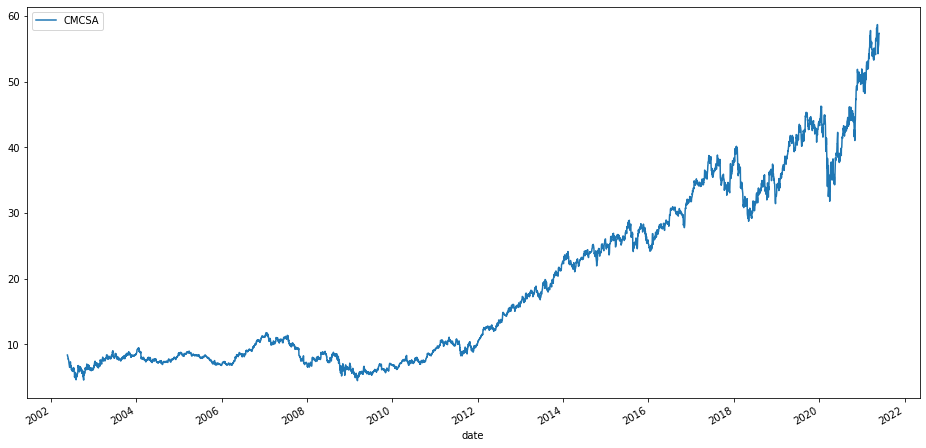

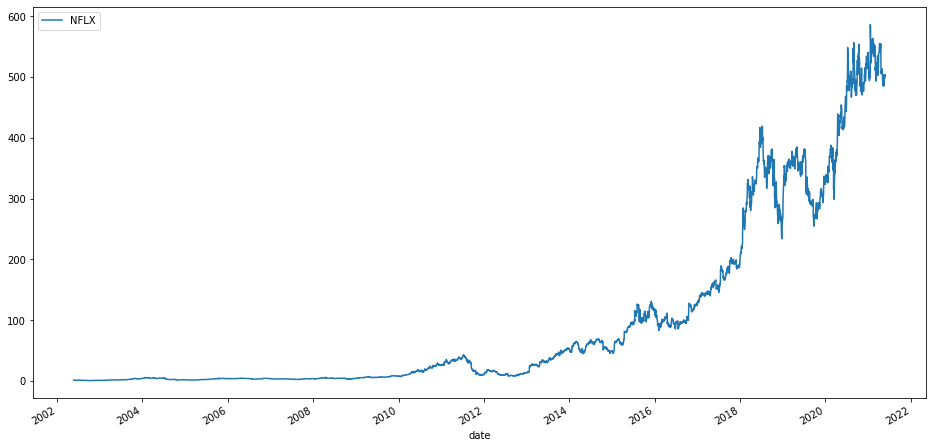

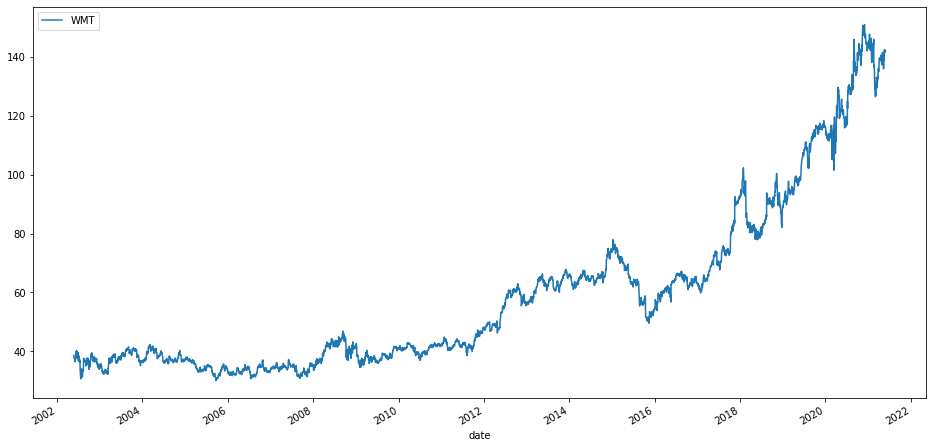

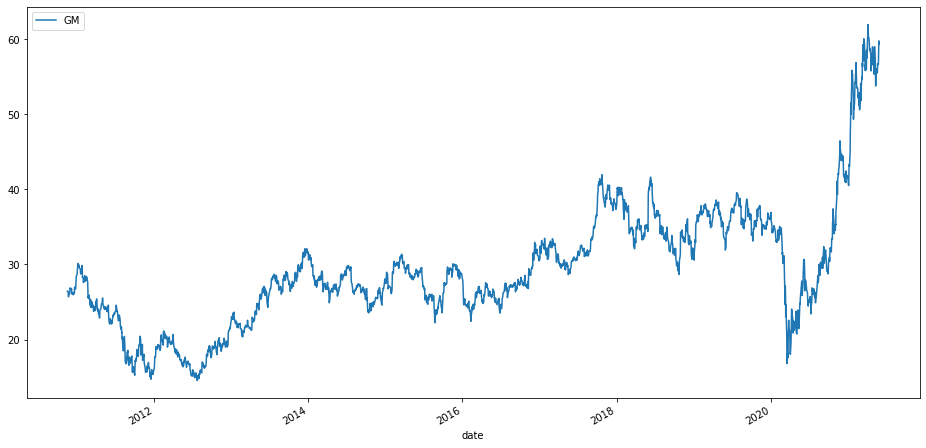

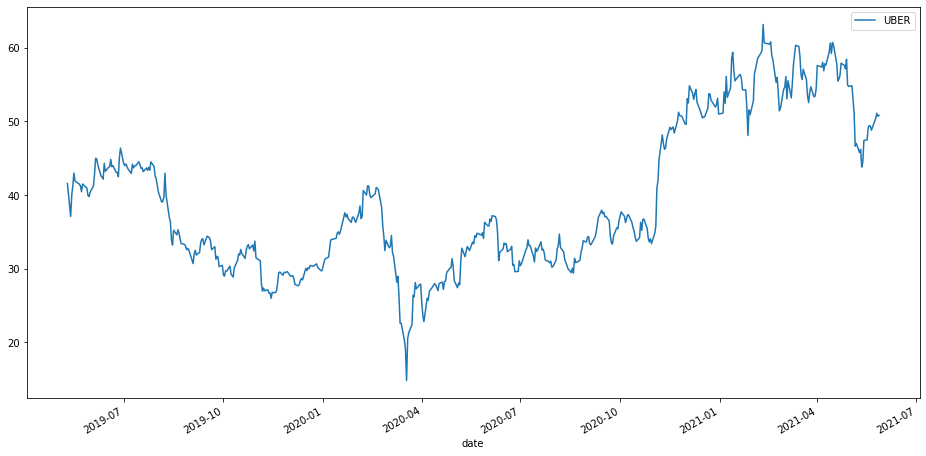

In [ ]:
"""Adjusted_Close values by company"""
WEN.plot(x='date', y='adj _close',label='WEN',figsize=(16,8),title='Adjusted Close')
PEP.plot(x='date', y='adj _close',label='PEP',figsize=(16,8),color='blue')
SBUX.plot(x='date', y='adj _close',label='SBUX',figsize=(16,8),color='blue')
PZZA.plot(x='date', y='adj _close',label='PZZA',figsize=(16,8))
CMCSA.plot(x='date', y='adj _close',label='CMCSA',figsize=(16,8))
NFLX.plot(x='date', y='adj _close',label='NFLX',figsize=(16,8))
WMT.plot(x='date', y='adj _close',label='WMT',figsize=(16,8))
GM.plot(x='date', y='adj _close',label='GM',figsize=(16,8))
UBER.plot(x='date', y='adj _close',label='UBER',figsize=(16,8))
plt.legend();

KeyError: ignored

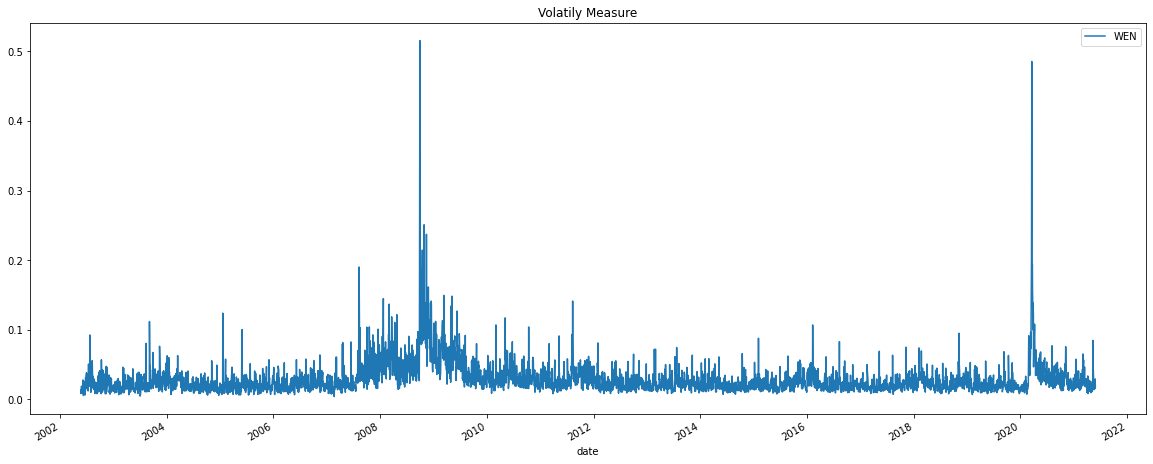

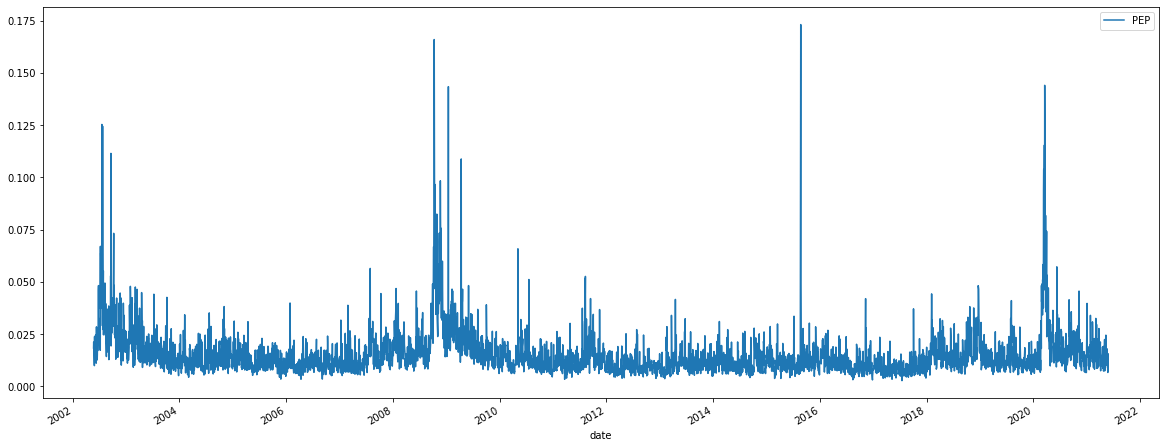

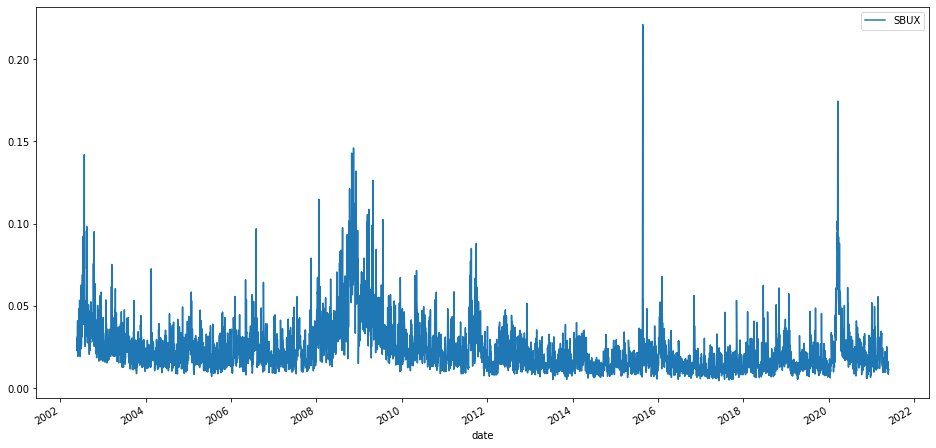

In [ ]:
"Estimated Volatile by company"
WEN.plot(x='date', y='VolStat',label='WEN',figsize=(20,8),title='Volatily Measure')
PEP.plot(x='date', y='VolStat',label='PEP',figsize=(20,8))
SBUX.plot(x='date', y='VolStat',label='SBUX',figsize=(16,8))
PZZA.plot(x='date', y='VolStat',label='PZZA',figsize=(16,8))
CMCSA.plot(x='date', y='VolStat',label='CMCSA',figsize=(16,8))
NFLX.plot(x='date', y='VolStat',label='NFLX',figsize=(16,8))
WMT.plot(x='date', y='VolStat',label='WMT',figsize=(16,8))
GM.plot(x='date', y='VolStat',label='GM',figsize=(16,8))
UBER.plot(x='date', y='VolStat',label='UBER',figsize=(16,8))
plt.legend();